In [1]:
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
from qutip import *
from qutip.piqs import *
import numpy as np
import array
from tqdm import tqdm
from numpy import diff
import array

In [2]:
wz = 1
wc = 1

N = 30

gc = 0.5*np.sqrt(wz*wc)

nphot = N

a  = tensor(destroy(nphot),qeye(nphot))
b = tensor(qeye(nphot), destroy(nphot))

print(gc)

0.5


In [3]:
H0 =  wc * a.dag() * a + wz * b.dag()*b
Hint = (a.dag()+a) * (b.dag()+b)

In [4]:
i = 100
gvec = np.linspace(0.1,1,i)
fide = np.zeros(i)
dg = 0.01

In [5]:
j = 0
for g in tqdm(gvec):
    Hc1 = H0 + g * Hint
    evals, ekets = Hc1.eigenstates()
    gnd1 = ekets[0]
    Hc2 = H0 + (g+dg) * Hint
    evals1, ekets1 = Hc2.eigenstates()
    gnd2 = ekets1[0]
    fide[j] = fidelity(gnd1, gnd2)
    j += 1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:22<00:00,  2.63s/it]


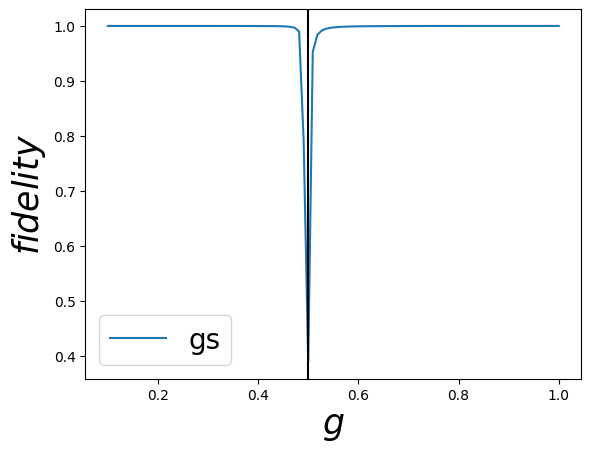

In [6]:
fig1 = plt.figure()

plt.plot(gvec, fide, '-' ,label = "gs")
plt.ylabel(r'$fidelity$', fontsize = 25)
plt.xlabel('$g$', fontsize = 25)
plt.legend(fontsize = 20)
plt.axvline(x=gc, color = 'black')